Problem Statement -
Build your own recommendation system for products on an e-commerce website like Amazon.com.
Dataset Link -
https://drive.google.com/file/d/1ClBptsK3V5KgKXtK2GSRzFNAW7GnTPDW/view?usp=sharing
Dataset columns - first three columns are userId, productId, and ratings and the fourth column is
timestamp. You can discard the timestamp column as in this case you may not need to use it.
Source - Amazon Reviews data (http://jmcauley.ucsd.edu/data/amazon/) The repository has
several datasets. For this case study, we are using the Electronics dataset.
Please do the analysis based on steps( 1 to 8) as given below -
Steps -
1. Read and explore the given dataset. ( Rename column/add headers, plot histograms,
find data characteristics)
2. Take a subset of the dataset to make it less sparse/ denser. ( For example, keep the
users only who has given 50 or more number of ratings )
3. Build Popularity Recommender model.
4. Split the data randomly into train and test dataset. ( For example, split it in 70/30 ratio)
5. Build Collaborative Filtering model.
6. Evaluate the above model. ( Once the model is trained on the training data, it can be
used to compute the error (like RMSE) on predictions made on the test data.) You can
also use a different method to evaluate the models.
7. Get top - K ( K = 5) recommendations. Since our goal is to recommend new products to
each user based on his/her habits, we will recommend 5 new products.
8. Summarise your insights.

# 1. Read and explore the given dataset. ( Rename column/add headers, plot histograms, find data characteristics)

In [3]:
import numpy as np
import pandas as pd
#Loading the dataset and adding headers
columns=['userId', 'productId', 'ratings','timestamp']
ratings_df=pd.read_csv('ratings_Electronics.csv',names=columns)
#Dropping the timestamp column
ratings_df.drop('timestamp',axis=1,inplace=True)

In [4]:
ratings_df.head()

,userId,productId,ratings
0,,132793040,5
1,A2CX7LUOHB2NDG,321732944,5
2,A2NWSAGRHCP8N5,439886341,1
3,A2WNBOD3WNDNKT,439886341,3
4,A1GI0U4ZRJA8WN,439886341,1


In [5]:
#Finding data Characteristics
ratings_df.describe()

,ratings
count,1.048576e+06
mean,3.973380e+00
std,1.399329e+00
min,1.000000e+00
25%,3.000000e+00
50%,5.000000e+00
75%,5.000000e+00
max,5.000000e+00


In [6]:
#Finding the shape of the data
ratings_df.shape

(1048576, 3)

In [7]:
ratings_df.dtypes

userId       object
productId    object
ratings       int64
dtype: object

In [8]:
#Finding missiing Values
print(ratings_df.isnull().sum())
print("There are no Missing values")

userId       0
productId    0
ratings      0
dtype: int64
There are no Missing values


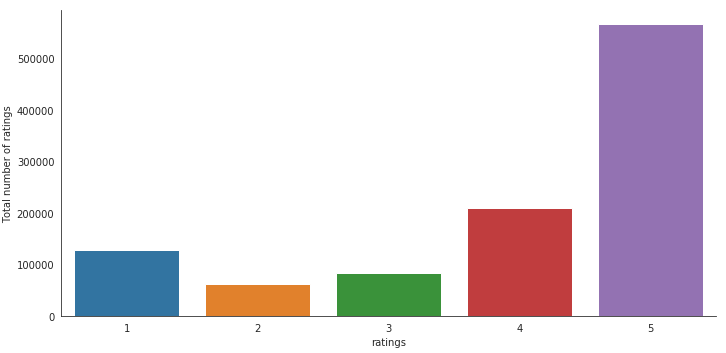

In [11]:
#Plotting Histogram
import matplotlib.pyplot as plt
import seaborn as sns
with sns.axes_style('white'):
    r=sns.catplot("ratings", data=ratings_df, aspect=2.0,kind='count')
    r.set_ylabels("Total number of ratings")

# 2. Take a subset of the dataset to make it less sparse/ denser. ( For example, keep the users only who has given 50 or more number of ratings )

In [10]:
counts=ratings_df.userId.value_counts()
#print(counts)
ratings_df_GT_50=ratings_df[ratings_df.userId.isin(counts[counts>=50].index)]
ratings_df_GT_50.head()

,userId,productId,ratings
2162,A5JLAU2ARJ0BO,1400532655,1
3050,ALUNVOQRXOZIA,1400599997,1
4614,A1VQHH85U7PX0,9043413585,3
6072,A250AXLRBVYKB4,998376234X,1
7381,A2AEZQ3DGBBLPR,B000000O48,5


# 3. Build Popularity Recommender model.

In [12]:
#Count of user_id for each unique product as recommendation score 
data_grouped = ratings_df_GT_50.groupby('productId').agg({'userId': 'count'}).reset_index()
data_grouped.rename(columns = {'userId': 'score'},inplace=True)
data_grouped.head()
#Sort the products on recommendation score 
data_sort = data_grouped.sort_values(['score', 'productId'], ascending = [0,1]) 
      
#Generate a recommendation rank based upon score 
data_sort['rank'] = data_sort['score'].rank(ascending=0, method='first') 
          
#Get the top 10 recommendations 
popularity_recommendations = data_sort.head(10) 
popularity_recommendations 

,productId,score,rank
146,B00004SB92,7,1.0
321,B00004ZCJE,5,2.0
479,B00005LEN4,5,3.0
1073,B00007KDVI,5,4.0
1199,B00008OE6I,5,5.0
2428,B0009RKL5S,5,6.0
2542,B000BKJZ9Q,5,7.0
299,B00004Z5M1,4,8.0
418,B00005AW1H,4,9.0
677,B0000645C9,4,10.0


# 4. Split the data randomly into train and test dataset. ( For example, split it in 70/30 ratio)

In [13]:
#Split the data randomnly into train and test datasets into 70:30 ratio
from sklearn.model_selection import train_test_split
train_data, test_data = train_test_split(ratings_df_GT_50, test_size = 0.3, random_state=0)
train_data.head()

,userId,productId,ratings
480025,A1JWSDDIH5Z7DV,B0002KQR1Y,5
971310,A1FR68QH6Z4YZM,B000GHTGES,5
107109,A6FIAB28IS79,B00005N6KF,4
605402,AKT8TGIT6VVZ5,B0007OV45O,5
240459,A2R6RA8FRBS608,B000087NBU,4


# 5. Build Collaborative Filtering model.

In [14]:
pivot_df = ratings_df_GT_50.pivot(index = 'userId', columns ='productId', values = 'ratings').fillna(0)
pivot_df.head()

productId,1400532655,1400599997,9043413585,998376234X,B000000O48,B000001OL6,B000001OMI,B000001OMN,B00000DM9W,B00000J05A,...,B000I992XY,B000I9B2AA,B000IALP88,B000IBRX4M,B000ICZZJG,B000IDCDZY,B000IDWDKO,B000IE5XIC,B000IE8Z4Q,B000IF4788
userId,,,,,,,,,,,,,,,,,,,,,
A11D1KHM7DVOQK,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A12DLJESJKM1OQ,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A1435P5AMCPB3X,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A149RNR5RH19YY,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A15QYHQH80W30L,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [15]:
print(pivot_df.shape)
print("It has 38 rows and 2943 columns")

(38, 2943)
It has 38 rows and 2943 columns


In [16]:
#As pivot_df is a sparse matrix we will use the Singular value Decomposition
from scipy.sparse.linalg import svds
U, sigma, Vt = svds(pivot_df, k = 10)
print('Left singular matrix: \n',U)
print('Sigma: \n',sigma)

Left singular matrix: 
 [[-6.64161696e-02  4.31528153e-04  3.37786414e-03  4.12558392e-02
  -2.89722101e-02  1.79284225e-02  3.02342026e-03 -3.52112579e-04
   2.45397452e-03  1.04887971e-02]
 [-1.80197050e-02  7.68657333e-04  7.20544067e-03  2.62748695e-02
  -1.97320291e-02  1.92531155e-02  1.69864914e-03  5.95174021e-03
  -1.93268622e-02  2.72017747e-02]
 [-6.86727933e-02 -1.49434527e-02  8.11418685e-02  1.90458879e-02
  -8.60896456e-03  2.13284435e-03  3.43354825e-04 -2.10703364e-04
   3.18370938e-03  1.15138368e-02]
 [ 1.53478750e-02  4.83314743e-03 -1.30024203e-02  3.99558068e-02
  -3.46573069e-03  3.87274114e-02  1.88223811e-03 -4.41856025e-07
  -1.09124307e-02  6.90452643e-03]
 [-7.19210074e-03  1.99921755e-03  3.61877490e-02  1.28627831e-02
  -7.04467382e-03 -1.12413800e-03  5.42691695e-02 -1.27481833e-03
   3.13621954e-03  1.13870943e-02]
 [-2.96100557e-02 -7.69782564e-02  4.25563509e-02  2.03047194e-02
  -7.02441403e-02  4.29041203e-02  3.21266108e-02 -3.38399429e-03
  -2.2940

In [18]:
#Converting sigma into a diagonol Matrix (i.e. Matrix with the values on the diagonal element)
sigma = np.diag(sigma)
print('Diagonal matrix: \n',sigma)

Diagonal matrix: 
 [[41.89390301  0.          0.          0.          0.          0.
   0.          0.          0.          0.        ]
 [ 0.         42.28479703  0.          0.          0.          0.
   0.          0.          0.          0.        ]
 [ 0.          0.         43.75491809  0.          0.          0.
   0.          0.          0.          0.        ]
 [ 0.          0.          0.         44.00142731  0.          0.
   0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.         45.99811068  0.
   0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.          0.         51.84242495
   0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.          0.          0.
  53.59174684  0.          0.          0.        ]
 [ 0.          0.          0.          0.          0.          0.
   0.         63.49228847  0.          0.        ]
 [ 0.          0.          0.        

In [ ]:
print('Right singular matrix: \n',Vt)

In [19]:
#predicting the ratings using the corresponding dot products
user_predicted_ratings = np.dot(np.dot(U, sigma), Vt) 
predictions_df = pd.DataFrame(user_predicted_ratings, columns = pivot_df.columns)
predictions_df.head()

productId,1400532655,1400599997,9043413585,998376234X,B000000O48,B000001OL6,B000001OMI,B000001OMN,B00000DM9W,B00000J05A,...,B000I992XY,B000I9B2AA,B000IALP88,B000IBRX4M,B000ICZZJG,B000IDCDZY,B000IDWDKO,B000IE5XIC,B000IE8Z4Q,B000IF4788
0,0.008496,0.000975,0.017130,0.009489,0.002576,0.273672,0.006995,0.014822,-0.001294,0.008682,...,0.007360,0.006995,0.042479,0.025488,-0.001294,0.004197,0.060605,0.047444,0.035227,0.026392
1,0.021403,0.000907,0.011784,0.005400,0.006628,0.098021,0.007664,0.006926,0.001527,0.038343,...,0.048133,0.007664,0.107014,0.064208,0.001527,0.004598,0.024748,0.027002,0.013018,0.019467
2,0.009910,0.000870,0.008238,0.004004,0.001872,0.262368,0.034362,0.012063,-0.000689,-0.031076,...,0.353545,0.034362,0.049551,0.029731,-0.000689,0.020617,0.058273,0.020021,0.035347,0.018342
3,0.003421,0.000552,0.013528,0.006192,0.001947,-0.000054,0.000268,0.002867,0.005244,0.102796,...,-0.010295,0.000268,0.017107,0.010264,0.005244,0.000161,0.004767,0.030960,-0.000254,0.010970
4,0.009934,0.000145,0.005831,0.002463,-0.000078,0.046547,0.016904,0.003214,-0.000880,-0.005246,...,0.188454,0.016904,0.049672,0.029803,-0.000880,0.010142,0.011490,0.012314,0.004482,0.022131


# 6. Evaluate the above model. ( Once the model is trained on the training data, it can be used to compute the error (like RMSE) on predictions made on the test data.) You can also use a different method to evaluate the models.

In [20]:
pivot_df.head()

productId,1400532655,1400599997,9043413585,998376234X,B000000O48,B000001OL6,B000001OMI,B000001OMN,B00000DM9W,B00000J05A,...,B000I992XY,B000I9B2AA,B000IALP88,B000IBRX4M,B000ICZZJG,B000IDCDZY,B000IDWDKO,B000IE5XIC,B000IE8Z4Q,B000IF4788
userId,,,,,,,,,,,,,,,,,,,,,
A11D1KHM7DVOQK,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A12DLJESJKM1OQ,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A1435P5AMCPB3X,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A149RNR5RH19YY,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A15QYHQH80W30L,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [21]:
pivot_df.mean().head()

productId
1400532655    0.026316
1400599997    0.026316
9043413585    0.078947
998376234X    0.026316
B000000O48    0.131579
dtype: float64

In [22]:
predictions_df.mean().head()

productId
1400532655    0.030646
1400599997    0.002071
9043413585    0.025324
998376234X    0.009998
B000000O48    0.008305
dtype: float64

In [23]:
rmse_df = pd.concat([pivot_df.mean(), predictions_df.mean()], axis=1)
rmse_df.columns = ['Avg_actual_ratings', 'Avg_predicted_ratings']
print(rmse_df.shape)
rmse_df['item_index'] = np.arange(0, rmse_df.shape[0], 1)
rmse_df.head()

(2943, 2)


,Avg_actual_ratings,Avg_predicted_ratings,item_index
productId,,,
1400532655,0.026316,0.030646,0
1400599997,0.026316,0.002071,1
9043413585,0.078947,0.025324,2
998376234X,0.026316,0.009998,3
B000000O48,0.131579,0.008305,4


In [1]:
RMSE = round((((rmse_df.Avg_actual_ratings - rmse_df.Avg_predicted_ratings) ** 2).mean() ** 0.5), 5)
print('\nRMSE SVD Model = {} \n'.format(RMSE))

NameError: name 'rmse_df' is not defined

# 7. Get top - K ( K = 5) recommendations. Since our goal is to recommend new products to each user based on his/her habits, we will recommend 5 new products.

In [24]:
# Recommend the items with the highest predicted ratings
def rec_items(userID, pivot_df, prediction_df, num_recos):
    # index starts at 0  
    user_id = userID-1 
    # Get and sort the user's ratings
    sorted_user_ratings = pivot_df.iloc[user_id].sort_values(ascending=False)
    #sorted_user_ratings
    sorted_user_predictions = predictions_df.iloc[user_id].sort_values(ascending=False)
    #sorted_user_predictions
    temp = pd.concat([sorted_user_ratings, sorted_user_predictions], axis=1)
    temp.index.name = 'Recommended Items'
    temp.columns = ['user_ratings', 'user_predictions']
    temp = temp.loc[temp.user_ratings == 0]   
    temp = temp.sort_values('user_predictions', ascending=False)
    print('\nBelow are the recommended items for user(user_id = {}):\n'.format(userID))
    print(temp.head(num_recos))
userID = 6
num_recos = 5
rec_items(userID, pivot_df, predictions_df, num_recos)


Below are the recommended items for user(user_id = 6):

                   user_ratings  user_predictions
Recommended Items                                
B00004ZCJE                  0.0          0.579875
B000GHDPHC                  0.0          0.541374
B0000UA3MA                  0.0          0.541374
B0001U6RNI                  0.0          0.528805
B00008GT9Y                  0.0          0.515756


C:\Users\Shivak\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  # Remove the CWD from sys.path while we load stuff.


# This is a new cell

# 8. Summarise your insights.

In [ ]:
Python was able to handle a csv file with more than 10 lakh records. It was taking time even to open the csv file in excel.
Popularity based recommendation systems are score based and are not personalized. They are like one solution to all.

Collaborative filtering on the other hand recommends items based on past user data. 

Predictions of each user are different and are computed using the dot product as shown above. This is a model based 
collaborative filtering.

Summarising with just the userID product ID and ratings of the users it is possible to target the right user for the right
product.



